In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# class ConsistencyEvaluation:
#     def __init__(self):
#         pass

#     def cross_consistency_rmsd(self, generated_pdb_paths, inverse_generated_pdb_paths):
        
#         pass

In [3]:
from pathlib import Path

In [22]:
npz_path = Path('/data/lux70/plaid/artifacts/samples/5j007z42/ddim/5j007z42/f2219_o3617/240917_0619/latent.npz')

In [23]:
import os
os.listdir(npz_path.parent)

['config.yaml',
 'inverse_generated',
 'latent.npz',
 'sample_config.yaml',
 'generated',
 'sample.log']

In [14]:
# !ls -r /data/lux70/plaid/artifacts/samples/5j007z42/ddim/5j007z42/f2219_o3617/240917_0619/*/*

In [41]:
import glob
import os
import re

generated_pdb_dir = npz_path.parent / "generated" / "structures"
generated_pdb_paths = glob.glob(str(generated_pdb_dir / "*.pdb"))
generated_pdb_paths.sort()

# print([re.findall(r"\d+", Path(p).stem)[0] for p in generated_pdb_paths])

In [57]:
inverse_generated_pdb_dir = npz_path.parent / "inverse_generated" / "structures"
inverse_generated_pdb_paths = glob.glob(str(inverse_generated_pdb_dir / "*.pdb"))
inverse_generated_pdb_paths.sort()

In [58]:
print(len(generated_pdb_paths))
print(len(inverse_generated_pdb_paths))

128
128


In [65]:
print(generated_pdb_paths[:3])
print(inverse_generated_pdb_paths[:3])

['/data/lux70/plaid/artifacts/samples/5j007z42/ddim/5j007z42/f2219_o3617/240917_0619/generated/structures/sample0.pdb', '/data/lux70/plaid/artifacts/samples/5j007z42/ddim/5j007z42/f2219_o3617/240917_0619/generated/structures/sample1.pdb', '/data/lux70/plaid/artifacts/samples/5j007z42/ddim/5j007z42/f2219_o3617/240917_0619/generated/structures/sample10.pdb']
['/data/lux70/plaid/artifacts/samples/5j007z42/ddim/5j007z42/f2219_o3617/240917_0619/inverse_generated/structures/sequence_0.pdb', '/data/lux70/plaid/artifacts/samples/5j007z42/ddim/5j007z42/f2219_o3617/240917_0619/inverse_generated/structures/sequence_1.pdb', '/data/lux70/plaid/artifacts/samples/5j007z42/ddim/5j007z42/f2219_o3617/240917_0619/inverse_generated/structures/sequence_10.pdb']


In [88]:
from plaid.utils import view_py3Dmol

with open(generated_pdb_paths[-1], "r") as f:
    gen_pdbstr = f.read()

with open(inverse_generated_pdb_paths[-1], "r") as f:
    inv_pdbstr = f.read()


import py3Dmol

view = py3Dmol.view(width=400, height=300)
view.addModelsAsFrames(gen_pdbstr)
view.addModelsAsFrames(inv_pdbstr)
view.setStyle({"model": 0}, {"cartoon": {"color": "purple"}})
view.setStyle({"model": 1}, {"cartoon": {"color": "yellow"}})
view.zoomTo()
view.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [68]:
from plaid.evaluation import run_tmalign

cctm = [run_tmalign(p1, p2) for (p1, p2) in zip(generated_pdb_paths, inverse_generated_pdb_paths)]

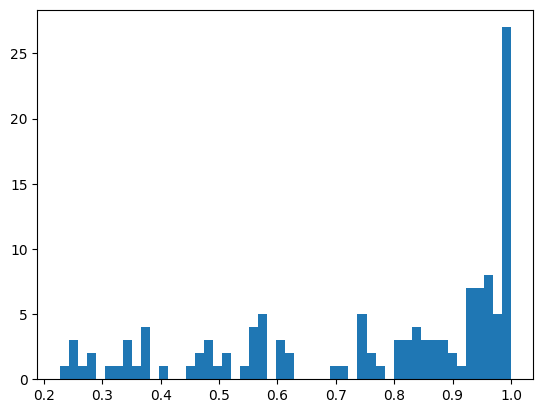

In [73]:
import matplotlib.pyplot as plt

_ = plt.hist(cctm, bins=50)

In [76]:
import numpy as np
print(np.mean(cctm), np.median(cctm), np.std(cctm))

0.762488359375 0.855495 0.24141172668796476


In [85]:
print(cctm)

[0.99031, 0.81648, 0.9944, 0.83398, 0.99442, 0.99255, 0.89365, 0.75056, 0.56595, 0.87877, 0.99647, 0.804, 0.24974, 0.99182, 0.44558, 0.50704, 0.55311, 0.93142, 0.84418, 0.9946, 0.62591, 0.81154, 0.70988, 0.94557, 0.70191, 0.98567, 0.46327, 0.473, 0.37761, 0.93975, 0.83616, 0.35381, 0.74813, 0.93784, 0.75216, 0.98843, 0.99143, 0.5695, 0.76129, 0.86047, 0.99627, 0.96925, 0.76817, 0.37863, 0.94905, 0.9516, 0.99667, 0.99308, 0.31437, 0.56801, 0.93567, 0.61567, 0.26071, 0.98279, 0.9996, 0.40755, 0.94655, 0.75232, 0.61275, 0.93321, 0.99393, 0.61282, 0.88613, 0.56597, 0.99754, 0.9984, 0.86487, 0.97236, 0.85052, 0.96788, 0.47557, 0.25086, 0.9899, 0.95803, 0.99455, 0.24735, 0.22765, 0.933, 0.96692, 0.28313, 0.57079, 0.99738, 0.90521, 0.96743, 0.96598, 0.98171, 0.99834, 0.86867, 0.99726, 0.32781, 0.34479, 0.98761, 0.99822, 0.91755, 0.55691, 0.92758, 0.8478, 0.57398, 0.37532, 0.94869, 0.76498, 0.50155, 0.28865, 0.73761, 0.93873, 0.33688, 0.81827, 0.87144, 0.96605, 0.84362, 0.93476, 0.48025, 0.808

In [87]:
from plaid.evaluation import batch_rmspd_from_pdb_paths

rmspd = batch_rmspd_from_pdb_paths(generated_pdb_paths, inverse_generated_pdb_paths)
print(rmspd)

[0.57804406, 2.7022183, 0.5713259, 1.7440758, 0.22075607, 0.6886858, 1.1131865, 1.5630512, 2.9384074, 1.4056305, 0.4050453, 1.5184828, 20.281376, 0.3548213, 4.2681065, 4.833815, 20.784912, 0.6087502, 1.3406647, 0.55649847, 3.7180607, 1.6349832, 1.9969683, 1.0485381, 2.4499035, 0.46988797, 23.613667, 3.6404023, 8.038012, 0.828999, 1.6874797, 11.353973, 1.9590076, 0.6167604, 2.2410908, 0.3182044, 0.42600152, 3.4171085, 3.3495698, 1.427745, 0.19621275, 0.6367112, 1.8147755, 21.85308, 0.8565252, 0.6897274, 0.356285, 0.37574992, 5.735014, 3.5425942, 1.3832095, 2.6043708, 8.834748, 0.41541427, 0.18729869, 4.3153086, 0.7103518, 1.972376, 1.9334807, 0.7410703, 0.2209108, 2.1663735, 1.0049802, 7.4597487, 0.22708988, 0.19497925, 1.2296731, 0.56205297, 3.9461713, 1.1527716, 7.936971, 7.886807, 0.44250354, 0.52172536, 0.30514687, 9.30207, 7.8665943, 1.2533168, 0.88604033, 7.710538, 3.7320752, 0.2930841, 2.618381, 0.63561964, 0.6419613, 0.42565432, 0.29217997, 1.6963195, 0.3422634, 6.464982, 5.5110

In [91]:
from plaid.evaluation._structure_metrics import batch_rmsd_calculation

rmsd = batch_rmsd_calculation(generated_pdb_paths, inverse_generated_pdb_paths)

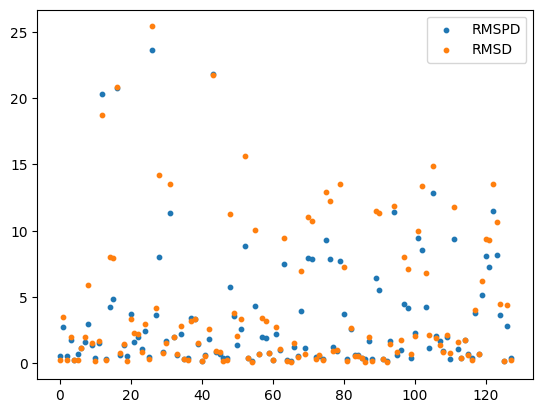

In [96]:
plt.scatter(np.arange(len(rmsd)), rmspd, label="RMSPD", s=10)
plt.scatter(np.arange(len(rmsd)), rmsd, label="RMSD", s=10)
plt.legend()
plt.show()

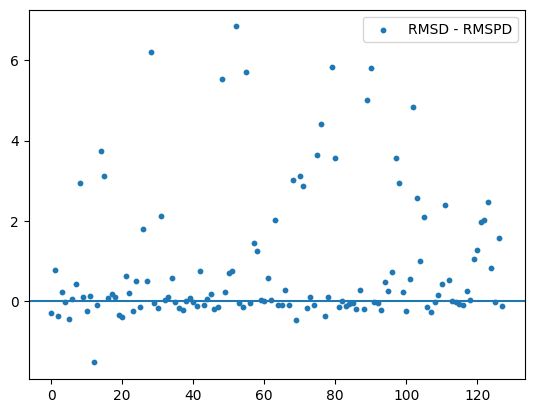

In [99]:
deltas = np.array(rmsd) - np.array(rmspd)
plt.scatter(np.arange(len(rmsd)), deltas, label="RMSD - RMSPD", s=10)
plt.axhline(y=0)
plt.legend()
plt.show()

In [106]:
experiment_dir = npz_path.parent
generated_fasta_path = experiment_dir / "generated" / "sequences.fasta"
inverse_generated_fasta_path = experiment_dir / "inverse_generated" / "sequences.fasta"

In [103]:
def read_sequences_from_fasta(fasta_path):
    sequences = {}
    with open(fasta_path, "r") as f:
        for line in f.readlines():
            if line[0] == ">":
                header = line.rstrip("\n")[1:]
            else:
                sequence = line.rstrip("\n")
                sequences[header] = sequence
    return sequences
                
        

In [121]:
gen_seqs_dict = read_sequences_from_fasta(generated_fasta_path)
inv_gen_seqs_dict = read_sequences_from_fasta(inverse_generated_fasta_path)

In [122]:
gen_seqs = [gen_seqs_dict[k] for k in sorted(gen_seqs_dict)]
inv_gen_seqs = [inv_gen_seqs_dict[k] for k in sorted(inv_gen_seqs_dict)]

In [126]:
from plaid.utils import calc_sequence_recovery
ccsrs = [calc_sequence_recovery(s1, s2) for (s1, s2) in zip(gen_seqs, inv_gen_seqs)]

(array([ 2.,  5.,  6., 10.,  2., 10., 11.,  7., 11.,  8., 13.,  8.,  5.,
        11.,  4.,  6.,  5.,  2.,  1.,  1.]),
 array([0.046875, 0.071875, 0.096875, 0.121875, 0.146875, 0.171875,
        0.196875, 0.221875, 0.246875, 0.271875, 0.296875, 0.321875,
        0.346875, 0.371875, 0.396875, 0.421875, 0.446875, 0.471875,
        0.496875, 0.521875, 0.546875]),
 <BarContainer object of 20 artists>)

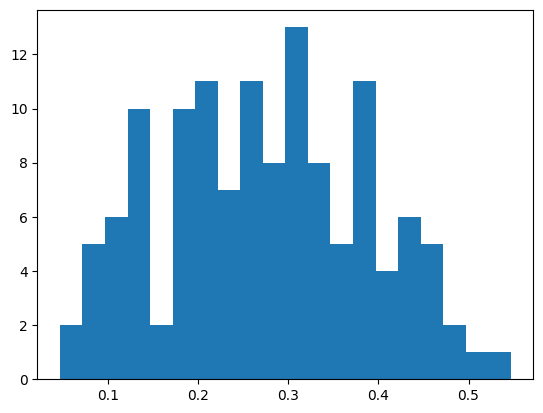

In [129]:
plt.hist(ccsrs, bins=20)

In [130]:
print(np.mean(ccsrs), np.median(ccsrs), np.std(ccsrs))

0.2720947265625 0.2734375 0.11247909934549472
